In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [7]:
# Import the requests library.
import requests

# Import the API key.
# Import the API key.
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | mahibadhoo
Processing Record 3 of Set 1 | nantucket
Processing Record 4 of Set 1 | vilhena
Processing Record 5 of Set 1 | uyuni
Processing Record 6 of Set 1 | gasa
Processing Record 7 of Set 1 | viedma
Processing Record 8 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | sakakah
Processing Record 12 of Set 1 | mar del plata
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | ojinaga
Processing Record 15 of Set 1 | nioki
Processing Record 16 of Set 1 | henties bay
Processing Record 17 of Set 1 | torbay
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | narsaq
Processing Record 20 of Set 1 | puerto maldonado
Processing Record 21 of Set 1 | placer
Processing Record

Processing Record 40 of Set 4 | khandbari
Processing Record 41 of Set 4 | morondava
Processing Record 42 of Set 4 | lasa
Processing Record 43 of Set 4 | noumea
Processing Record 44 of Set 4 | samarai
Processing Record 45 of Set 4 | hithadhoo
Processing Record 46 of Set 4 | pevek
Processing Record 47 of Set 4 | muravlenko
Processing Record 48 of Set 4 | port-gentil
Processing Record 49 of Set 4 | yulara
Processing Record 50 of Set 4 | yellowknife
Processing Record 1 of Set 5 | fairbanks
Processing Record 2 of Set 5 | samusu
City not found. Skipping...
Processing Record 3 of Set 5 | barrow
Processing Record 4 of Set 5 | okakarara
Processing Record 5 of Set 5 | baruun-urt
Processing Record 6 of Set 5 | metro
Processing Record 7 of Set 5 | belaya gora
Processing Record 8 of Set 5 | kalmunai
Processing Record 9 of Set 5 | lagoa
Processing Record 10 of Set 5 | verkhnevilyuysk
Processing Record 11 of Set 5 | dondo
Processing Record 12 of Set 5 | kelme
Processing Record 13 of Set 5 | camopi
Pr

Processing Record 31 of Set 8 | dudinka
Processing Record 32 of Set 8 | chipinge
Processing Record 33 of Set 8 | mago
Processing Record 34 of Set 8 | nefteyugansk
Processing Record 35 of Set 8 | mergui
City not found. Skipping...
Processing Record 36 of Set 8 | larvik
Processing Record 37 of Set 8 | owando
Processing Record 38 of Set 8 | chlorakas
Processing Record 39 of Set 8 | chicama
Processing Record 40 of Set 8 | mirador
Processing Record 41 of Set 8 | egvekinot
Processing Record 42 of Set 8 | princesa isabel
Processing Record 43 of Set 8 | mana
Processing Record 44 of Set 8 | fethiye
Processing Record 45 of Set 8 | acari
Processing Record 46 of Set 8 | quatre cocos
Processing Record 47 of Set 8 | norman wells
Processing Record 48 of Set 8 | togur
Processing Record 49 of Set 8 | jackson
Processing Record 50 of Set 8 | vila franca do campo
Processing Record 1 of Set 9 | san vicente
Processing Record 2 of Set 9 | kouroussa
Processing Record 3 of Set 9 | sucua
Processing Record 4 of 

Processing Record 18 of Set 12 | innisfail
Processing Record 19 of Set 12 | coro
Processing Record 20 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 21 of Set 12 | kokopo
Processing Record 22 of Set 12 | kirkwall
Processing Record 23 of Set 12 | djambala
Processing Record 24 of Set 12 | terrace
Processing Record 25 of Set 12 | zhanakorgan
Processing Record 26 of Set 12 | hualmay
Processing Record 27 of Set 12 | sungaipenuh
Processing Record 28 of Set 12 | fare
Processing Record 29 of Set 12 | pokhara
Processing Record 30 of Set 12 | bandarbeyla
Processing Record 31 of Set 12 | deep river
Processing Record 32 of Set 12 | tarakan
Processing Record 33 of Set 12 | aquiraz
Processing Record 34 of Set 12 | shenjiamen
Processing Record 35 of Set 12 | dutlwe
Processing Record 36 of Set 12 | ossora
Processing Record 37 of Set 12 | cuamba
Processing Record 38 of Set 12 | burnie
Processing Record 39 of Set 12 | moscow
Processing Record 40 of Set 12 | sur
Processing Record 41 of Set 12 | 

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,81.97,77,44,11.16,KI,2022-02-02 00:02:52
1,Mahibadhoo,3.7833,72.9667,82.51,75,36,13.49,MV,2022-02-02 00:02:01
2,Nantucket,41.2835,-70.0995,36.97,79,100,18.54,US,2022-02-02 00:00:27
3,Vilhena,-12.7406,-60.1458,67.48,97,81,1.88,BR,2022-02-02 00:02:53
4,Uyuni,-20.4597,-66.8250,49.30,70,78,12.37,BO,2022-02-02 00:02:54
5,Gasa,31.5000,34.4667,49.17,61,0,5.64,PS,2022-02-02 00:02:54
6,Viedma,-40.8135,-62.9967,73.98,38,27,12.41,AR,2022-02-02 00:02:55
7,Rikitea,-23.1203,-134.9692,78.22,70,89,6.04,PF,2022-02-02 00:01:41
8,Sakakah,29.9697,40.2064,45.59,51,0,6.80,SA,2022-02-02 00:02:56
9,Mar Del Plata,-38.0023,-57.5575,70.88,75,0,5.01,AR,2022-02-02 00:02:56


In [14]:
new_column_order = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Butaritari,44,KI,2022-02-02 00:02:52,77,3.0707,172.7902,81.97,11.16
1,Mahibadhoo,36,MV,2022-02-02 00:02:01,75,3.7833,72.9667,82.51,13.49
2,Nantucket,100,US,2022-02-02 00:00:27,79,41.2835,-70.0995,36.97,18.54
3,Vilhena,81,BR,2022-02-02 00:02:53,97,-12.7406,-60.1458,67.48,1.88
4,Uyuni,78,BO,2022-02-02 00:02:54,70,-20.4597,-66.8250,49.30,12.37
5,Gasa,0,PS,2022-02-02 00:02:54,61,31.5000,34.4667,49.17,5.64
6,Viedma,27,AR,2022-02-02 00:02:55,38,-40.8135,-62.9967,73.98,12.41
7,Rikitea,89,PF,2022-02-02 00:01:41,70,-23.1203,-134.9692,78.22,6.04
8,Sakakah,0,SA,2022-02-02 00:02:56,51,29.9697,40.2064,45.59,6.80
9,Mar Del Plata,0,AR,2022-02-02 00:02:56,75,-38.0023,-57.5575,70.88,5.01


In [15]:
# Create the output file (CSV).
output_data_file = "C:/Users/m143795/Desktop/Class/World_Weather_Analysis/weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

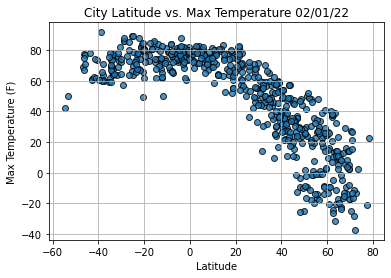

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("C:/Users/m143795/Desktop/Class/World_Weather_Analysis/weather_data/Fig1.png")

# Show plot.
plt.show()

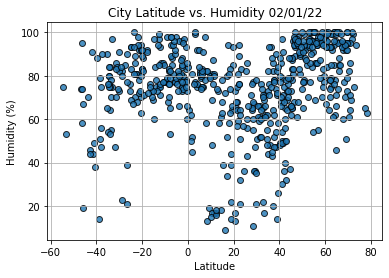

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("C:/Users/m143795/Desktop/Class/World_Weather_Analysis/weather_data//Fig2.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()